<a href="https://colab.research.google.com/github/durgasreeborra/topic-modeling-on-news-articles/blob/main/Copy_of_Welcome_To_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project Title : TOPIC MODELLING ON NEWS ARTICLES**

#**Contribution-Team**


**Team Member 1-Jashwanth Vemuri**

**Team Member 2-Bhaskar purimitla**

**Team Member 3-Meghana Kantamneni**

**Team Member 4-Durgasree Borra**


#**Problem Description**:
In this project your task is to identify major themes/topics across a collection of BBC news articles. You can
use clustering algorithms such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA) etc



#**Data Description:**
The dataset contains a set of news articles for each major segment consisting of business, entertainment,
politics, sports, and technology.



**In this project, you are required to do.**

• Create an aggregate dataset of all the news articles and perform topic modelling on the dataset.

• Verify whether these topics correspond to the different tags available

#**Meghana Workspace**


**Connecting To Drive**

In [ ]:
import os
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


**Data Ingestion**

In [ ]:

data = {}
categories = ["business", "entertainment", "politics", "sport", "tech"]

for category in categories:
    category_data = []
    category_dir = os.path.join("/content/drive/MyDrive/data/Temp", category)

    file_list = os.listdir(category_dir)
    for file_name in file_list:
        with open(os.path.join(category_dir, file_name), 'r', encoding='iso-8859-1') as file:
            text = file.read()
            category_data.append(text)
    data[category] = category_data
data

{'business': ['India widens access to telecoms\n\nIndia has raised the limit for foreign direct investment in telecoms companies from 49% to 74%.\n\nCommunications Minister Dayanidhi Maran said that there is a need to fund the fast-growing mobile market. The government hopes to increase the number of mobile users from 95 million to between 200 and 250 million by 2007. "We need at least $20bn (Â£10.6bn) in investment and part of this has to come as foreign direct investment," said Mr Maran. The decision to raise the limit for foreign investors faced considerable opposition from the communist parties, which give crucial support to the coalition headed by Prime Minister Manmohan Singh. Potential foreign investors will however need government approval before they increase their stake beyond 49%, Mr Maran said. Key positions, such as those of chief executive, chief technology officer and chief financial officer are to be held by Indians, he added.\n\nAnalysts and investors have welcomed the

**Data Exploration**

In [ ]:
import os
import pandas as pd

# Create an empty dictionary to store data categorized by different categories.
data = {}
categories = ["business", "entertainment", "politics", "sport", "tech"]

# Define a dictionary to store exploration results.
exploration_results = {}
all_articles=[]

# Loop through each category.
for category in categories:
    category_data = []
    category_dir = os.path.join("/content/drive/MyDrive/data/Temp", category)

    file_list = os.listdir(category_dir)
    for file_name in file_list:
        with open(os.path.join(category_dir, file_name), 'r', encoding='iso-8859-1') as file:
            text = file.read()
            # Remove spaces between words
            text = ' '.join(text.split())  # This removes extra spaces
            category_data.append(text)

    # Store the category's data in the 'data' dictionary.
    data[category] = category_data
    all_articles.extend(category_data)


    # Perform data exploration for the current category.
    num_documents = len(category_data)
    total_characters = sum(len(doc) for doc in category_data)
    average_characters = total_characters / num_documents

    # Store exploration results in the 'exploration_results' dictionary.
    exploration_results[category] = {
        "Num Documents": num_documents,
        "Total Characters": total_characters,
        "Average Characters per Document": average_characters,
    }
# Task 2.1.1: Display the dataset's structure (first few rows)
print("Task 2.1.1: Display the dataset's structure (first few rows)")
for category, category_data in data.items():
    print(f"Category: {category}")
    for i, document in enumerate(category_data[:5]):
        print(f"Document {i + 1}: {document[:100]}...")  # Display the first 100 characters

# Task 2.1.2: Print column names and data types
print("\nTask 2.1.2: Print column names and data types")
for category, category_data in data.items():
    print(f"Category: {category}")
    df = pd.DataFrame({'Text': category_data})
    print(df.dtypes)
    print()

# Check for Missing Values:

# Task 2.1.3: Identify missing values and provide a summary
print("Task 2.1.3: Identify missing values and provide a summary")
for category, category_data in data.items():
    print(f"Category: {category}")
    df = pd.DataFrame({'Text': category_data})
    missing_values = df.isnull().sum()
    print(missing_values)
    print()

# Summary Statistics: (Not applicable to text data)

# Task 2.1.4: Compute summary statistics for text lengths
print("Task 2.1.4: Summary Statistics for Text Lengths")
for category, category_data in data.items():
    print(f"Category: {category}")
    df = pd.DataFrame({'Text': category_data})
    df['Text Length'] = df['Text'].apply(len)
    summary_stats = df['Text Length'].describe(percentiles=[.25, .75])
    print(summary_stats[['count', 'mean', 'std', 'min', 'max']])
    print()







Task 2.1.1: Display the dataset's structure (first few rows)
Category: business
Document 1: Ad sales boost Time Warner profit Quarterly profits at US media giant TimeWarner jumped 76% to $1.13...
Document 2: Call centre users 'lose patience' Customers trying to get through to call centres are getting impati...
Document 3: Yukos unit buyer faces loan claim The owners of embattled Russian oil giant Yukos are to ask the buy...
Document 4: Telegraph newspapers axe 90 jobs The Daily and Sunday Telegraph newspapers are axing 90 journalist j...
Document 5: India calls for fair trade rules India, which attends the G7 meeting of seven leading industrialised...
Category: entertainment
Document 1: Gallery unveils interactive tree A Christmas tree that can receive text messages has been unveiled a...
Document 2: Famed music director Viotti dies Conductor Marcello Viotti, director of Venice's famous La Fenice Th...
Document 3: Uganda bans Vagina Monologues Uganda's authorities have banned the play 

# **Durga sree work space**


# **JASHWANTH Workspace**

# **Categorical Analysis**

 Displaying the dataset's structure (first few rows)
Category: business
Document 1: Ad sales boost Time Warner profit Quarterly profits at US media giant TimeWarner jumped 76% to $1.13...
Document 2: Call centre users 'lose patience' Customers trying to get through to call centres are getting impati...
Document 3: Yukos unit buyer faces loan claim The owners of embattled Russian oil giant Yukos are to ask the buy...
Document 4: Telegraph newspapers axe 90 jobs The Daily and Sunday Telegraph newspapers are axing 90 journalist j...
Document 5: India calls for fair trade rules India, which attends the G7 meeting of seven leading industrialised...
Category: entertainment
Document 1: Gallery unveils interactive tree A Christmas tree that can receive text messages has been unveiled a...
Document 2: Famed music director Viotti dies Conductor Marcello Viotti, director of Venice's famous La Fenice Th...
Document 3: Uganda bans Vagina Monologues Uganda's authorities have banned the play The Vagi

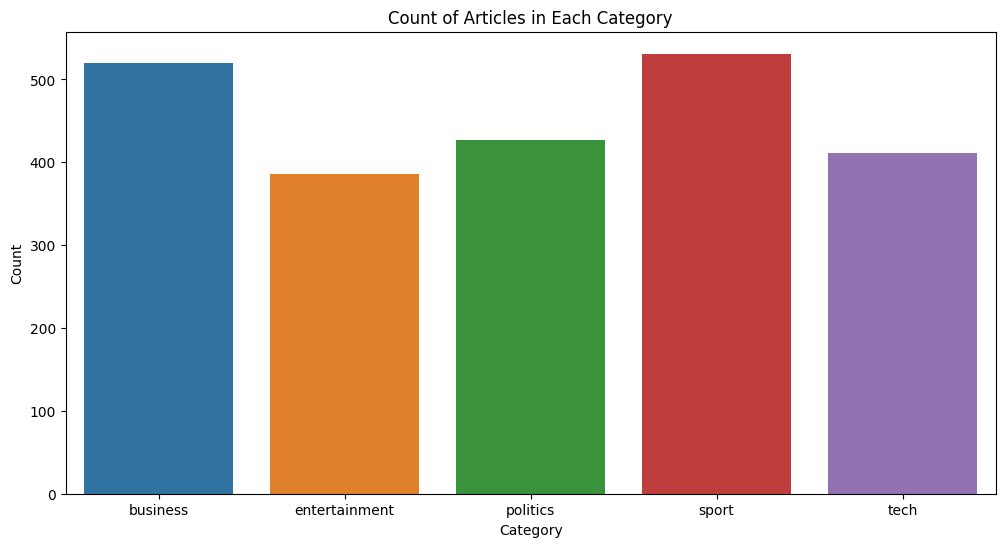

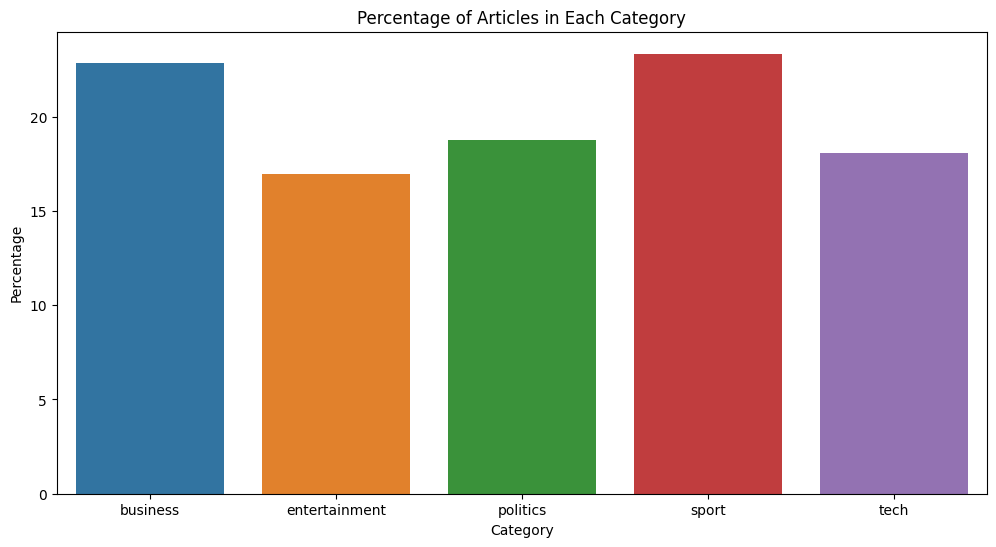

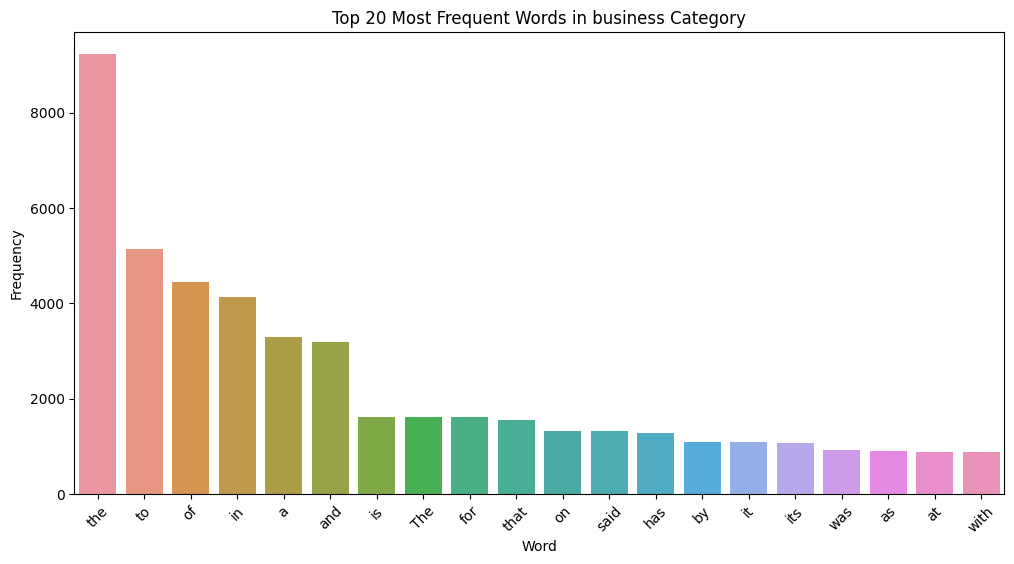


Interpretation:
The word frequency analysis reveals the most frequent terms in the news articles for this category.
Some common words may include generic terms related to the category, but specific keywords may also appear.
These keywords could provide insights into the main topics or subjects covered in the articles.

Category: entertainment
Top 10 Most Frequent Words in entertainment Category:
  Word  Frequency
0  the       6456
1  and       2933
2   of       2926
3   to       2853
4   in       2643
5    a       2496
6  The       1699
7  for       1507
8  was       1129
9   on       1113


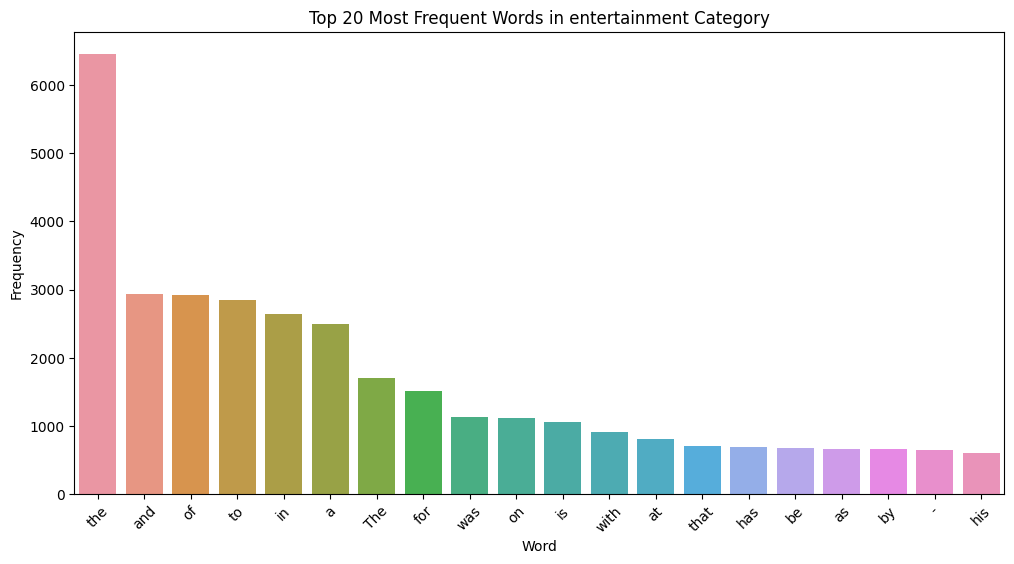


Interpretation:
The word frequency analysis reveals the most frequent terms in the news articles for this category.
Some common words may include generic terms related to the category, but specific keywords may also appear.
These keywords could provide insights into the main topics or subjects covered in the articles.

Category: politics
Top 10 Most Frequent Words in politics Category:
   Word  Frequency
0   the      10808
1    to       6086
2    of       4548
3   and       3848
4     a       3728
5    in       3186
6   for       1900
7    is       1842
8  that       1795
9    on       1778


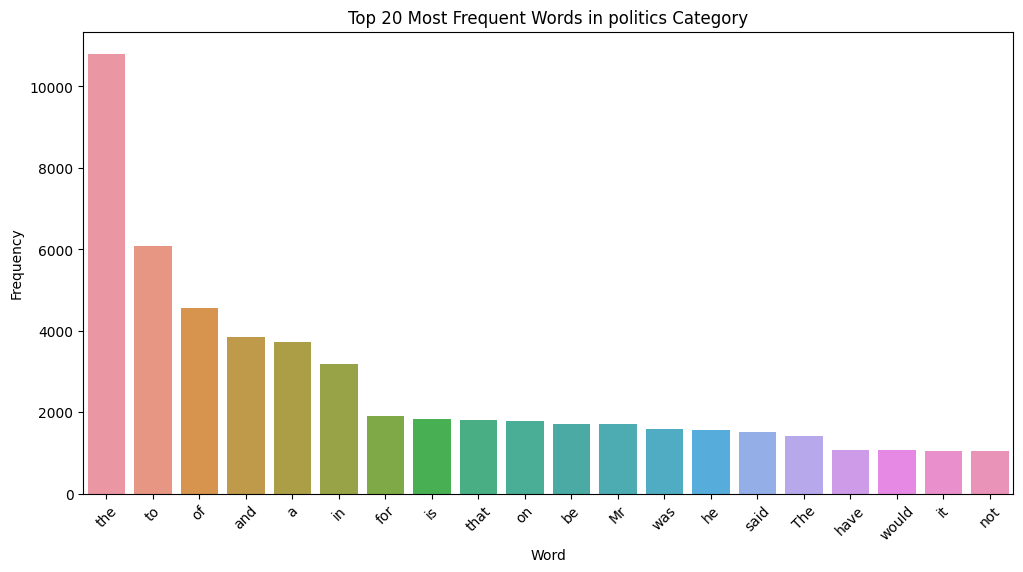


Interpretation:
The word frequency analysis reveals the most frequent terms in the news articles for this category.
Some common words may include generic terms related to the category, but specific keywords may also appear.
These keywords could provide insights into the main topics or subjects covered in the articles.

Category: sport
Top 10 Most Frequent Words in sport Category:
  Word  Frequency
0  the       8907
1   to       4794
2    a       3773
3   in       3649
4  and       3525
5   of       2857
6  for       1755
7   is       1493
8  was       1481
9   on       1468


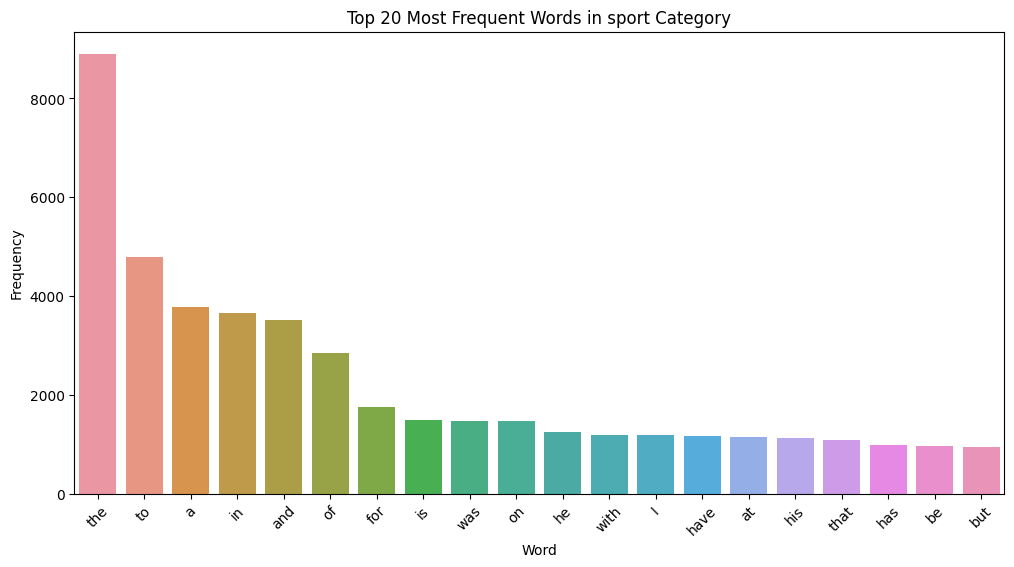


Interpretation:
The word frequency analysis reveals the most frequent terms in the news articles for this category.
Some common words may include generic terms related to the category, but specific keywords may also appear.
These keywords could provide insights into the main topics or subjects covered in the articles.

Category: tech
Top 10 Most Frequent Words in tech Category:
   Word  Frequency
0   the       9958
1    to       6394
2    of       5418
3   and       4710
4     a       4151
5    in       3213
6    is       2549
7  that       2537
8   for       2045
9   The       1774


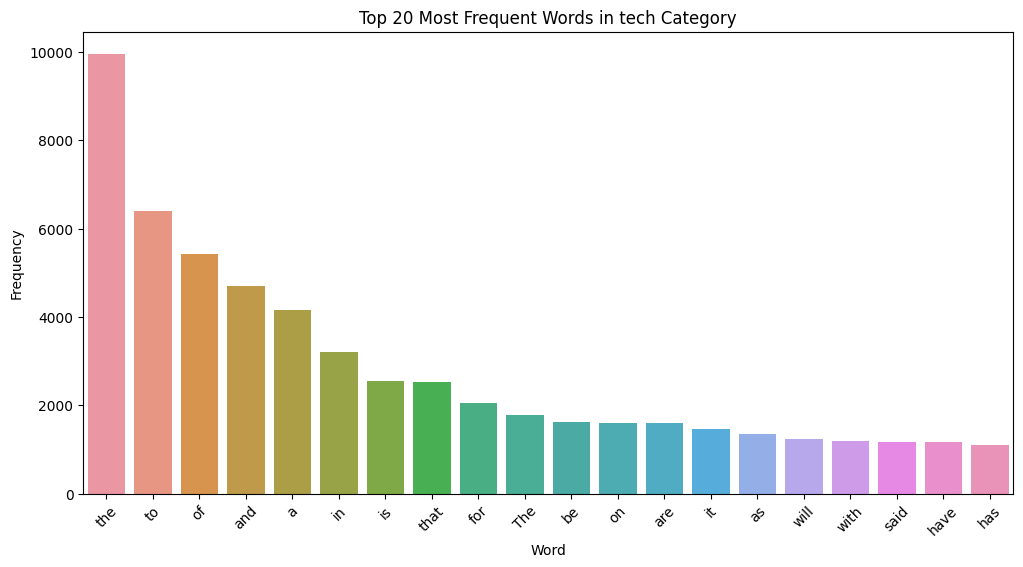


Interpretation:
The word frequency analysis reveals the most frequent terms in the news articles for this category.
Some common words may include generic terms related to the category, but specific keywords may also appear.
These keywords could provide insights into the main topics or subjects covered in the articles.

Word Cloud Visualization

Category: business


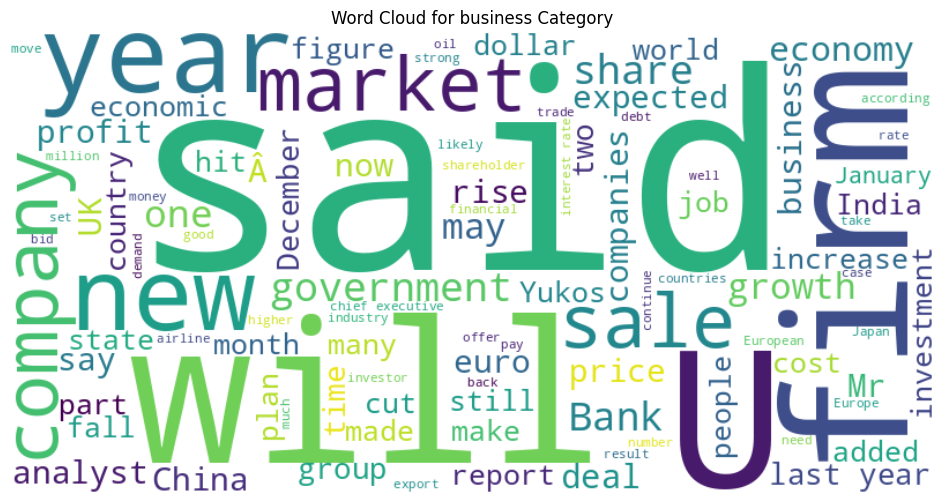


Category: entertainment


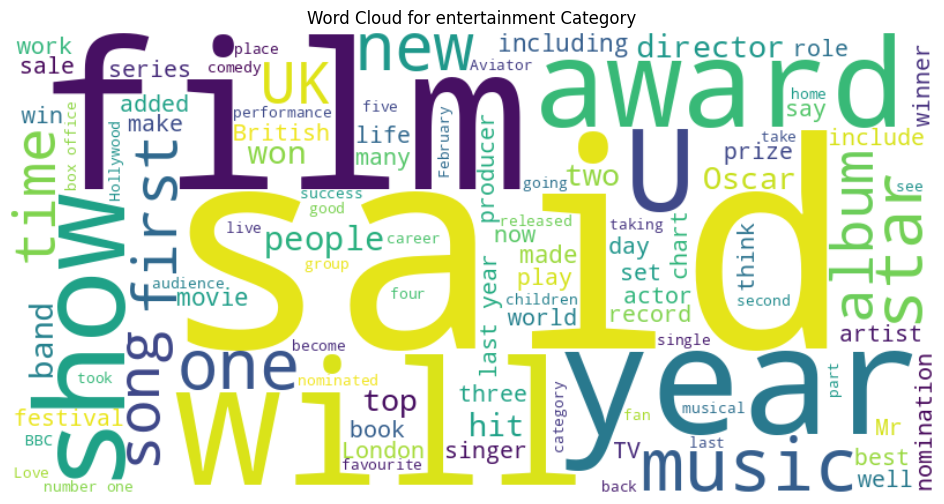


Category: politics


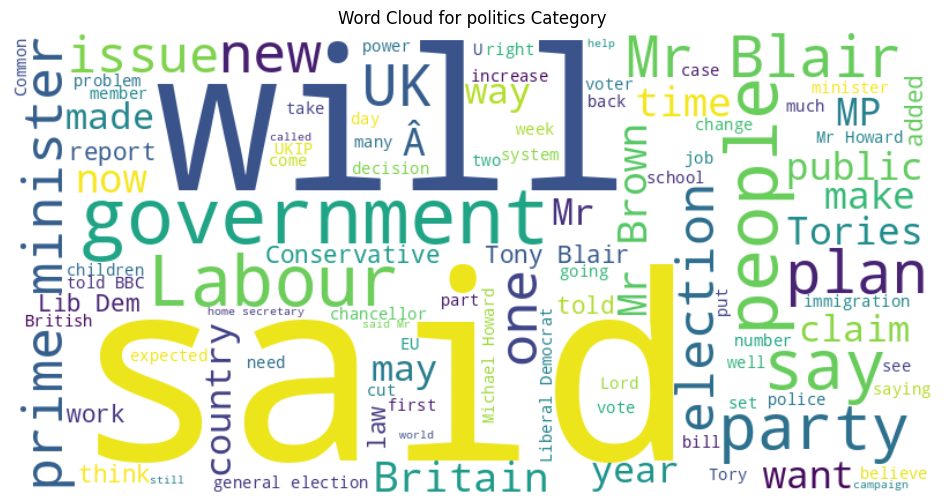


Category: sport


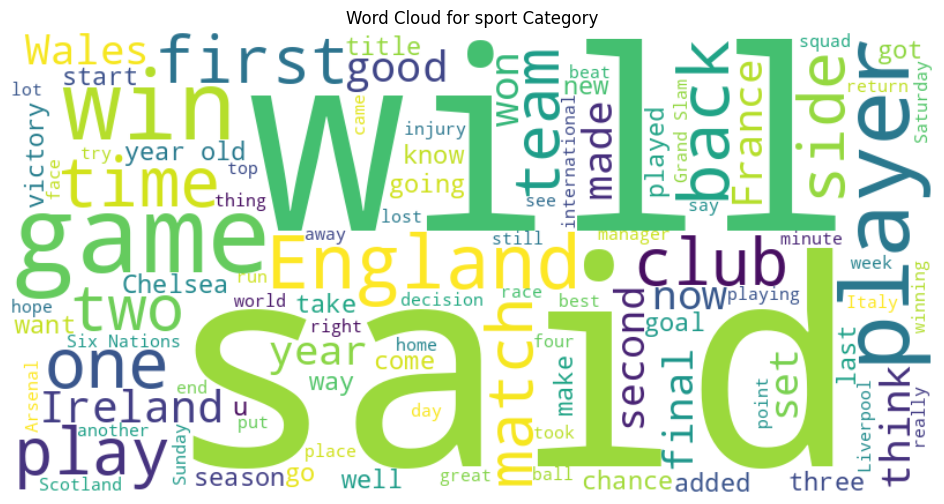


Category: tech


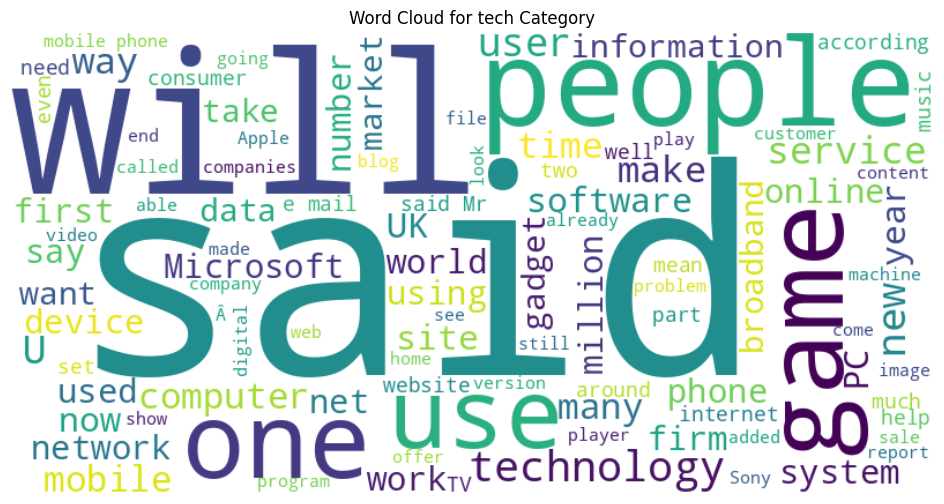

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob  # For sentiment analysis

# Create a function for category analysis
def perform_category_analysis(category_data):
    num_documents = len(category_data)
    total_characters = sum(len(doc) for doc in category_data)
    average_characters = total_characters / num_documents
    return {
        "Num Documents": num_documents,
        "Total Characters": total_characters,
        "Average Characters per Document": average_characters,
    }

# Initialize a list to store all article data
all_articles = []

# Loop through each category.
for category in categories:
    category_data = []
    category_dir = os.path.join("/content/drive/MyDrive/data/Temp", category)

    file_list = os.listdir(category_dir)
    for file_name in file_list:
        with open(os.path.join(category_dir, file_name), 'r', encoding='iso-8859-1') as file:
            text = file.read()
            # Remove spaces between words
            text = ' '.join(text.split())  # This removes extra spaces
            category_data.append(text)

    # Store the category's data in the 'data' dictionary.
    data[category] = category_data

    # Store all article data for later use
    all_articles.extend(category_data)

    # Perform data exploration for the current category.
    exploration_results[category] = perform_category_analysis(category_data)

# Calculate the total number of articles
total_articles = len(all_articles)

# Task 2.1.1: Display the dataset's structure (first few rows)
print(" Displaying the dataset's structure (first few rows)")
for category, category_data in data.items():
    print(f"Category: {category}")
    for i, document in enumerate(category_data[:5]):
        print(f"Document {i + 1}: {document[:100]}...")  # Display the first 100 characters

# Task 2.1.2: Print column names and data types
print("\n Column names and data types")
for category, category_data in data.items():
    print(f"Category: {category}")
    df = pd.DataFrame({'Text': category_data})
    print(df.dtypes)
    print()

# Check for Missing Values:

# Task 2.1.3: Identify missing values and provide a summary
print("Identify missing values")
for category, category_data in data.items():
    print(f"Category: {category}")
    df = pd.DataFrame({'Text': category_data})
    missing_values = df.isnull().sum()
    print(missing_values)
    print()


# Task 2.1.4: Compute summary statistics for text lengths
print("Task 2.1.4: Summary Statistics for Text Lengths")
for category, category_data in data.items():
    print(f"Category: {category}")
    df = pd.DataFrame({'Text': category_data})
    df['Text Length'] = df['Text'].apply(len)
    summary_stats = df['Text Length'].describe(percentiles=[.25, .75])
    print(summary_stats[['count', 'mean', 'std', 'min', 'max']])
    print()

# Categorical Analysis
print("Categorical Analysis")

# Calculate the category counts
category_counts = [len(category_data) for category_data in data.values()]

# Task 2.2.1: Category Distribution Visualization (Count)
plt.figure(figsize=(12, 6))
sns.barplot(x=categories, y=category_counts)
plt.title('Count of Articles in Each Category')
plt.xlabel('Category')
plt.ylabel('Count')

# Calculate and display the category percentages
category_percentages = [(category, len(category_data) / total_articles * 100) for category, category_data in data.items()]

print("Category Percentages:")
for category, percentage in category_percentages:
    print(f"{category}: {percentage:.2f}%")

# Task 2.2.2: Category Distribution Visualization (Percentage)
plt.figure(figsize=(12, 6))
sns.barplot(x=categories, y=[percentage for _, percentage in category_percentages])
plt.title('Percentage of Articles in Each Category')
plt.xlabel('Category')
plt.ylabel('Percentage')

# Task 2.3.2: Sentiment Analysis
print("\nSentiment Analysis")
for category, category_data in data.items():
    print(f"\nCategory: {category}")
    sentiment_scores = [TextBlob(doc).sentiment.polarity for doc in category_data]

    # Determine sentiment labels based on polarity
    sentiment_labels = ['Positive' if score > 0 else 'Negative' if score < 0 else 'Neutral' for score in sentiment_scores]

    # Create a DataFrame to store sentiment analysis results
    sentiment_df = pd.DataFrame({'Sentiment Score': sentiment_scores, 'Sentiment Label': sentiment_labels})

    # Display sentiment scores and labels
    print(sentiment_df)


# Task 2.4.1: Word Frequency Calculation and Visualization
print("\nWord Frequency Analysis and Visualization")
for category, category_data in data.items():
    print(f"\nCategory: {category}")
    # Combine all documents in the category into a single text corpus
    category_corpus = ' '.join(category_data)

    # Tokenize the text into words
    words = category_corpus.split()

    # Calculate word frequencies
    word_frequencies = pd.Series(words).value_counts().reset_index()
    word_frequencies.columns = ['Word', 'Frequency']

    # Display the top 10 most frequent words in the category
    print(f"Top 10 Most Frequent Words in {category} Category:")
    print(word_frequencies.head(10))

    # Visualize the word frequency distribution for the top 20 words
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Word', y='Frequency', data=word_frequencies.head(20))
    plt.title(f'Top 20 Most Frequent Words in {category} Category')
    plt.xlabel('Word')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

    # Interpretation
    print("\nInterpretation:")
    print("The word frequency analysis reveals the most frequent terms in the news articles for this category.")
    print("Some common words may include generic terms related to the category, but specific keywords may also appear.")
    print("These keywords could provide insights into the main topics or subjects covered in the articles.")

# Task 2.4.2: Word Cloud Visualization
print("\nWord Cloud Visualization")
for category, category_data in data.items():
    print(f"\nCategory: {category}")
    # Combine all documents in the category into a single text corpus
    category_corpus = ' '.join(category_data)

    # Generate a word cloud from the text corpus
    wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(category_corpus)

    # Display the word cloud
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {category} Category')
    plt.axis('off')
    plt.show()

### **Category Distribution Visualization**

Text(0, 0.5, 'Percentage')

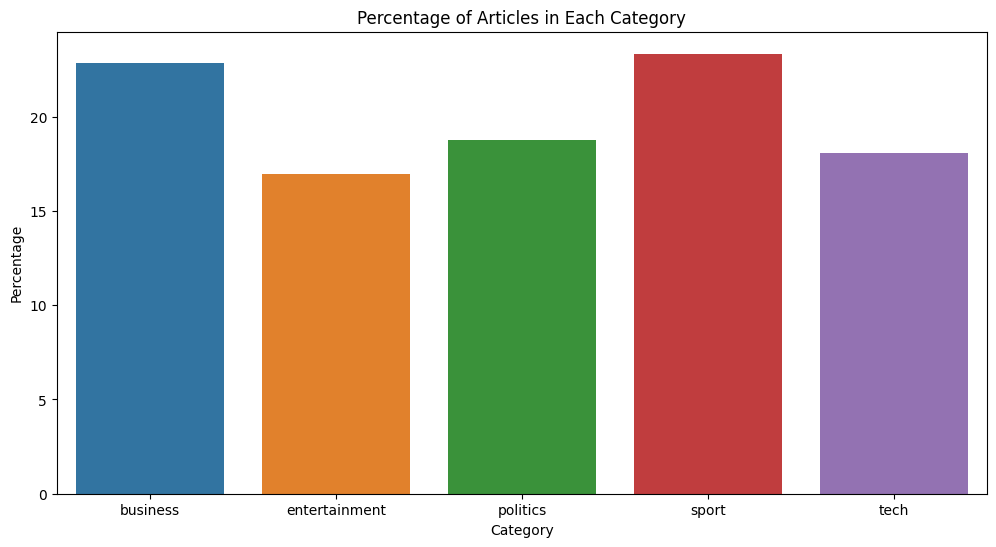

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x=categories, y=[percentage for _, percentage in category_percentages])
plt.title('Percentage of Articles in Each Category')
plt.xlabel('Category')
plt.ylabel('Percentage')

### **Sentiment Analysis**

In [ ]:
for category, category_data in data.items():
    print(f"\nCategory: {category}")
    sentiment_scores = [TextBlob(doc).sentiment.polarity for doc in category_data]

    # Determine sentiment labels based on polarity
    sentiment_labels = ['Positive' if score > 0 else 'Negative' if score < 0 else 'Neutral' for score in sentiment_scores]

    # Create a DataFrame to store sentiment analysis results
    sentiment_df = pd.DataFrame({'Sentiment Score': sentiment_scores, 'Sentiment Label': sentiment_labels})

    # Display sentiment scores and labels
    print(sentiment_df)


Category: business
     Sentiment Score Sentiment Label
0           0.135920        Positive
1           0.059552        Positive
2          -0.003889        Negative
3           0.111052        Positive
4           0.106856        Positive
..               ...             ...
515         0.000748        Positive
516        -0.041529        Negative
517        -0.008485        Negative
518         0.170707        Positive
519         0.115792        Positive

[520 rows x 2 columns]

Category: entertainment
     Sentiment Score Sentiment Label
0          -0.046919        Negative
1           0.167265        Positive
2          -0.022576        Negative
3           0.332609        Positive
4           0.002789        Positive
..               ...             ...
381         0.232684        Positive
382         0.101793        Positive
383         0.114286        Positive
384         0.085985        Positive
385         0.181038        Positive

[386 rows x 2 columns]

Category: politics

### **Word Frequency Calculation and Visualization**


Category: business
Top 10 Most Frequent Words in business Category:
   Word  Frequency
0   the       9229
1    to       5145
2    of       4454
3    in       4126
4     a       3300
5   and       3187
6    is       1623
7   The       1612
8   for       1604
9  that       1547


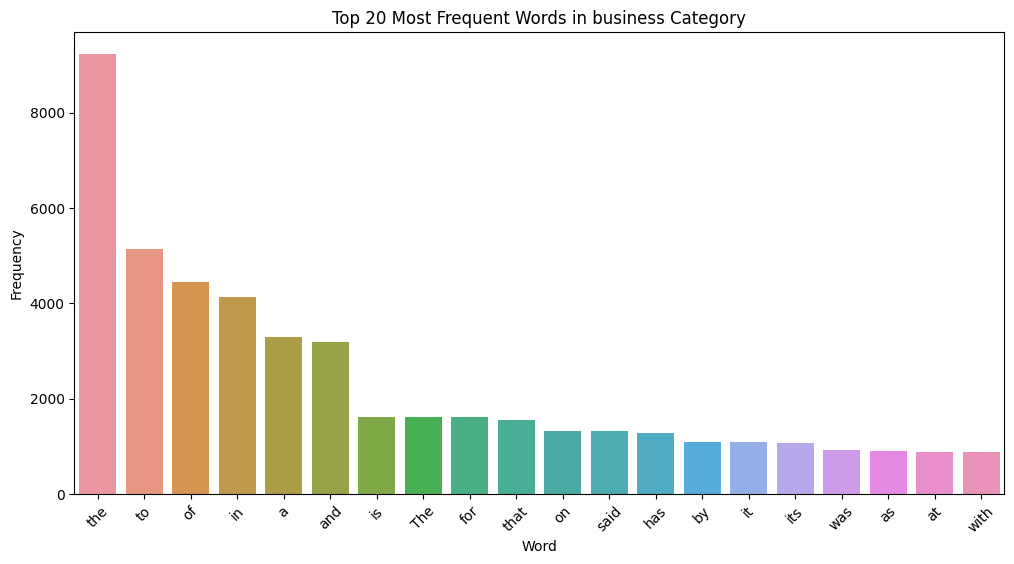


Category: entertainment
Top 10 Most Frequent Words in entertainment Category:
  Word  Frequency
0  the       6456
1  and       2933
2   of       2926
3   to       2853
4   in       2643
5    a       2496
6  The       1699
7  for       1507
8  was       1129
9   on       1113


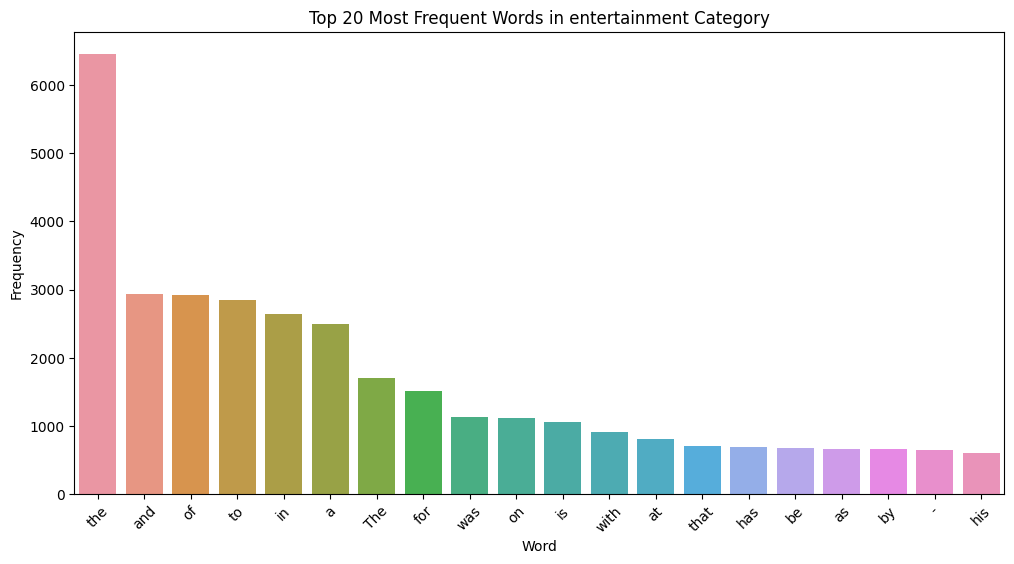


Category: politics
Top 10 Most Frequent Words in politics Category:
   Word  Frequency
0   the      10808
1    to       6086
2    of       4548
3   and       3848
4     a       3728
5    in       3186
6   for       1900
7    is       1842
8  that       1795
9    on       1778


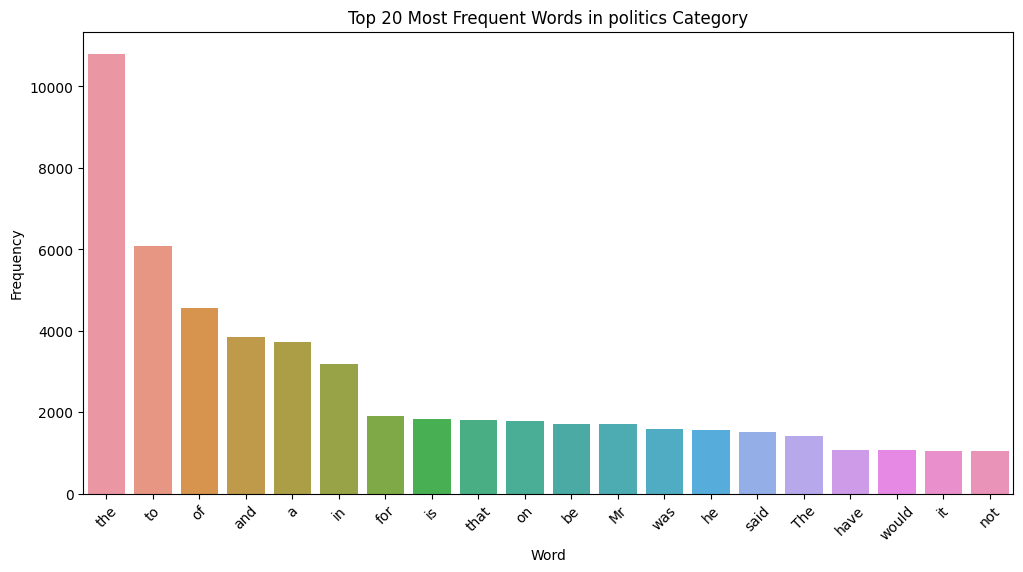


Category: sport
Top 10 Most Frequent Words in sport Category:
  Word  Frequency
0  the       8907
1   to       4794
2    a       3773
3   in       3649
4  and       3525
5   of       2857
6  for       1755
7   is       1493
8  was       1481
9   on       1468


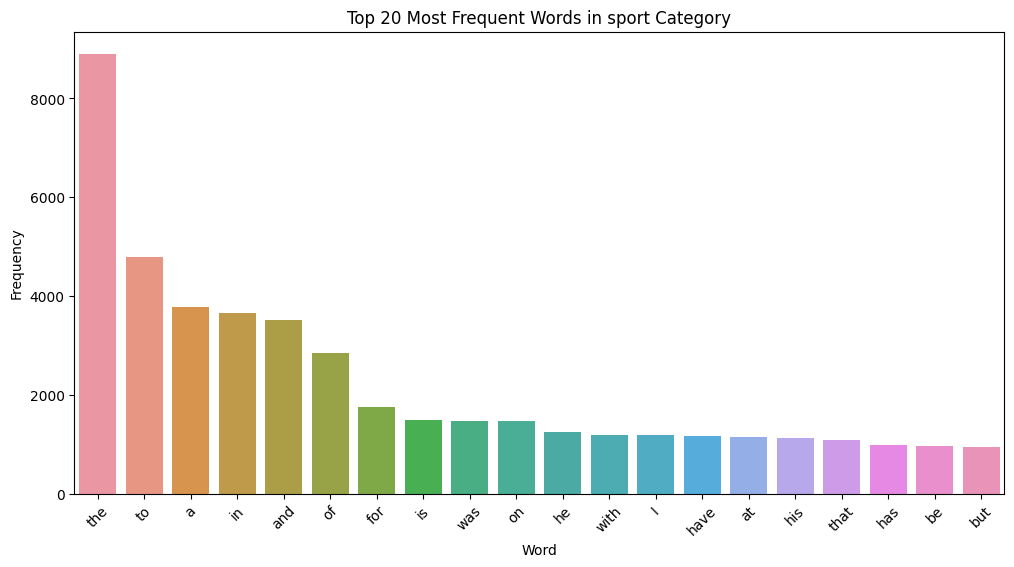


Category: tech
Top 10 Most Frequent Words in tech Category:
   Word  Frequency
0   the       9958
1    to       6394
2    of       5418
3   and       4710
4     a       4151
5    in       3213
6    is       2549
7  that       2537
8   for       2045
9   The       1774


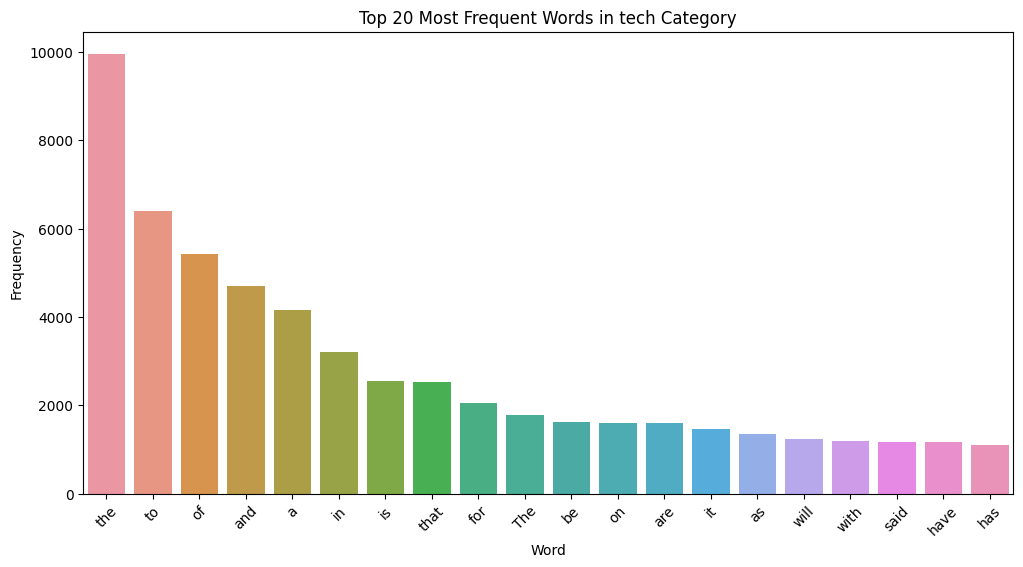

In [ ]:
for category, category_data in data.items():
    print(f"\nCategory: {category}")
    # Combine all documents in the category into a single text corpus
    category_corpus = ' '.join(category_data)

    # Tokenize the text into words
    words = category_corpus.split()

    # Calculate word frequencies
    word_frequencies = pd.Series(words).value_counts().reset_index()
    word_frequencies.columns = ['Word', 'Frequency']

    # Display the top 10 most frequent words in the category
    print(f"Top 10 Most Frequent Words in {category} Category:")
    print(word_frequencies.head(10))


    plt.figure(figsize=(12, 6))
    sns.barplot(x='Word', y='Frequency', data=word_frequencies.head(20))
    plt.title(f'Top 20 Most Frequent Words in {category} Category')
    plt.xlabel('Word')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

### **Word Cloud Visualization**


Category: business


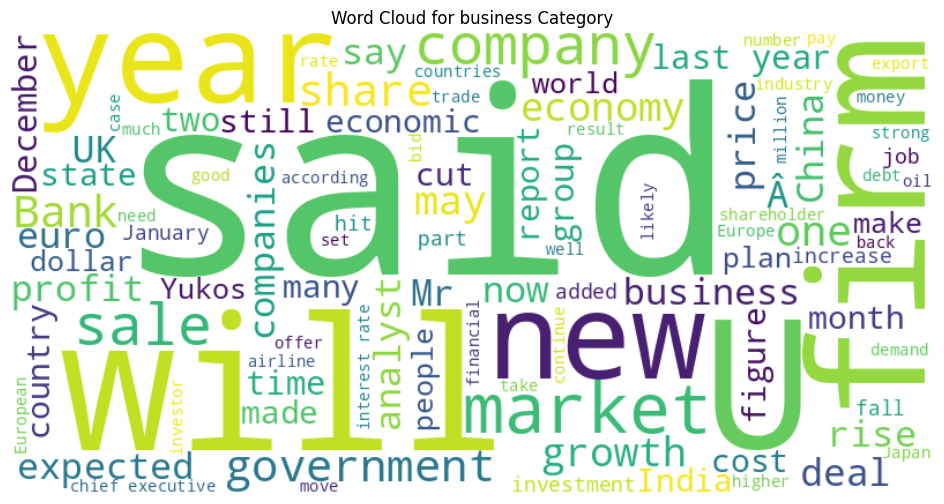


Category: entertainment


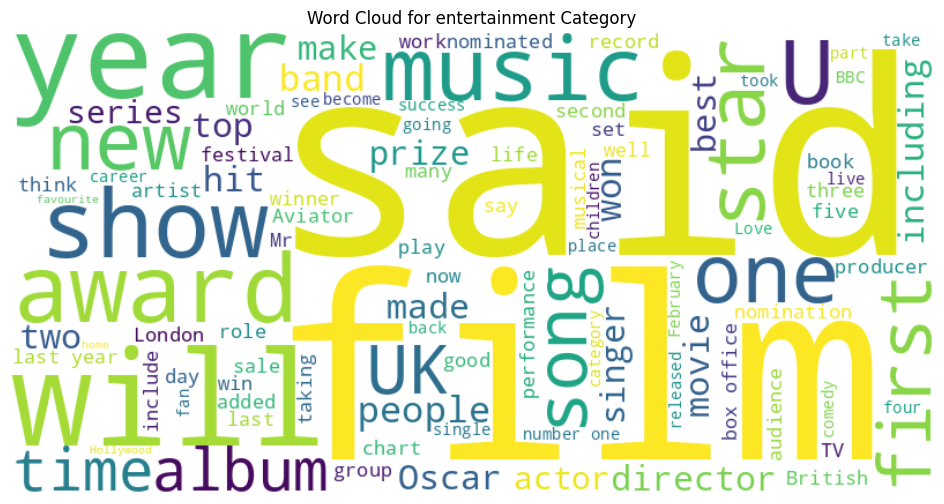


Category: politics


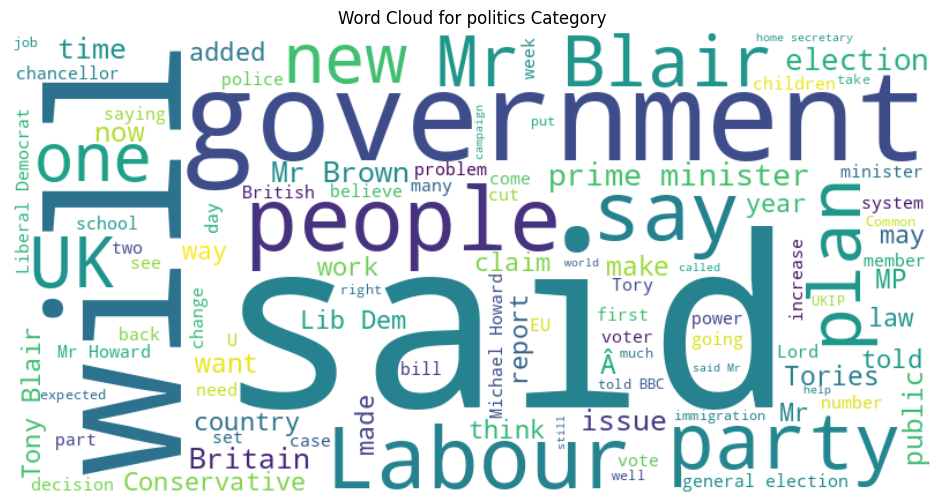


Category: sport


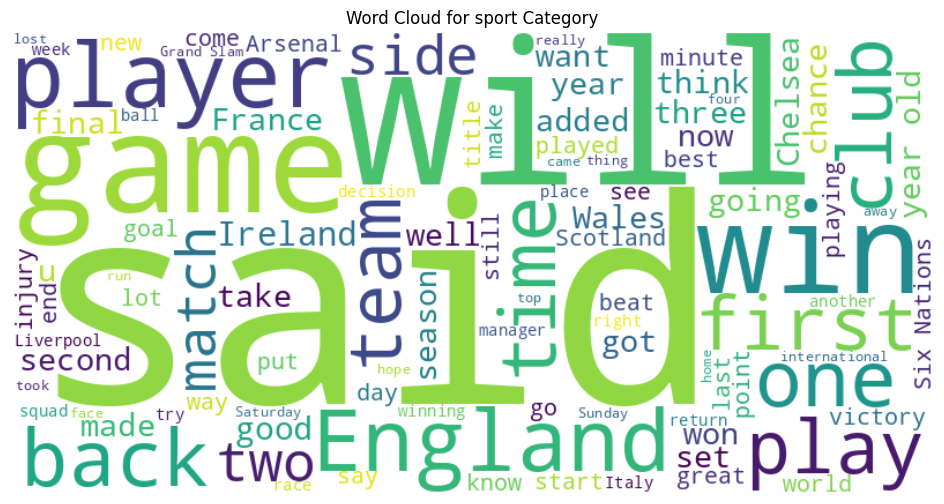


Category: tech


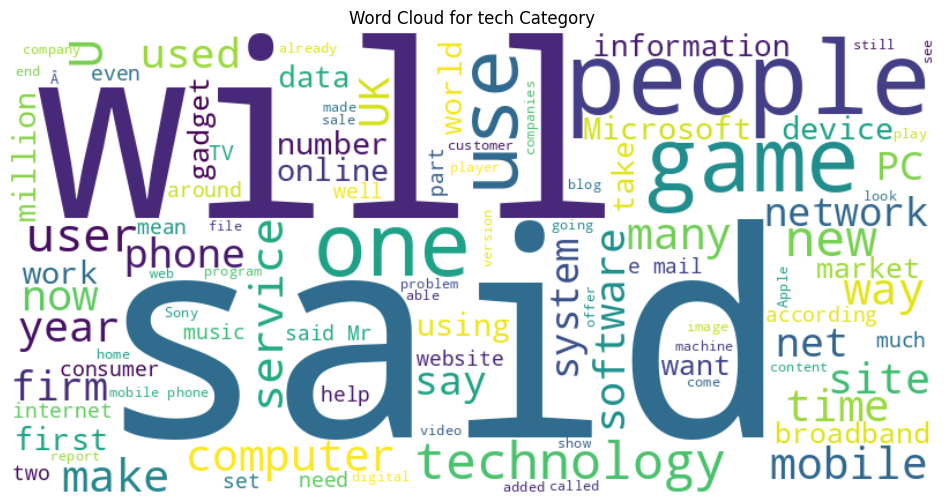

In [ ]:
for category, category_data in data.items():
    print(f"\nCategory: {category}")
    # Combine all documents in the category into a single text corpus
    category_corpus = ' '.join(category_data)

    # Generate a word cloud from the text corpus
    wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(category_corpus)

    # Display the word cloud
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {category} Category')
    plt.axis('off')
    plt.show()

#**Bhaskar Workspace**

In [ ]:
import pandas as pd
import numpy as np
import nltk

**Tokenization**

In [ ]:
from nltk.tokenize import word_tokenize

In [ ]:
def tokens(text):
    tokenization=word_tokenize(text)
    return ' '.join(i for i in tokenization)

**Punctuation Removing**

In [ ]:
import string

In [ ]:
def punctuation_removal(text):
    return ''.join(word for word in text if word not in string.punctuation)

**Removing Stop words**

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
#view stopwords in 'english' language
print(stopwords.words('english'))

In [ ]:
def stop(text):
    stop_word=stopwords.words('english')
    without_stopwords=[]
    for i in text.split():
        if i not in stop_word:
            without_stopwords.append(i)
    return ' '.join(i for i in without_stopwords)

**Performing pre-processing on our data**

In [ ]:
nltk.download('punkt')

In [ ]:
#Accessing the each file from the dictionary
for value in data.values():
    cleaned_data=[]
    for text in value:
        # Removing punctuation and converting into lowercase
        punct=punctuation_removal(text.lower())
        # removing stopwords
        new_words=stop(punct)
        # tokenization and adding result to the list
        cleaned_data.append(tokens(new_words))
cleaned_data

**Stemming**

In [ ]:
from nltk.stem import LancasterStemmer

In [ ]:
# initializing the LancasterStemmer class
stemmer=LancasterStemmer()

#create a function for stemming
def st(text):
    stemmed_words=[stemmer.stem(word) for word in text.split(' ')]
    return ' '.join(i for i in stemmed_words)

#create a new list to store the stemmed words
result_text=[]
for word in cleaned_data:
    result_text.append(st(word))
result_text

# **Vectorization**

**Tfidf-Vectorizer**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
#initializing the Tfidf-Vectorizer Class
vectorizer=TfidfVectorizer(lowercase=True,stop_words='english',max_features=100)

# fit and transform the data into the vectorizer
tfidf_matrix=vectorizer.fit_transform(result_text)
#convert matrix into array
tfidf_array=tfidf_matrix.toarray()

#convert array into
tfidf_dataframe=pd.DataFrame(tfidf_array)
tfidf_dataframe

**CountVectorizer**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# intializing the Countvectorizer
cv=CountVectorizer(max_features=20)

#fit the data into the vectorizer
matrix=cv.fit_transform(result_text)

#converting the matrix into an array
array=matrix.toarray()

#converting array into dataframe
countvect_dataframe=pd.DataFrame(array)
countvect_dataframe